In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import pickle

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


## Import Dataset

In [3]:
df_pen = sns.load_dataset('penguins')

In [4]:
df_pen = df_pen.dropna()

In [5]:
df_pen = df_pen.sample(frac=1).reset_index(drop=True)

In [6]:
X = df_pen.drop(['body_mass_g'], axis = 1)
y = df_pen['body_mass_g']

## Data Pre-processing

In [7]:
# categorical_x = ['species', 'island', 'sex']
# numerical_x = X.drop(categorical_x, axis = 1).columns

In [8]:
# ## If y is categorical:
# # y.fillna(y.mode(), inplace= True)
# ##If y is numerical
# y.fillna(y.mean(), inplace= True)
# for i in numerical_x:
#     X[i].fillna(X[i].mean(), inplace = True)

# for i in categorical_x:
#     X[i].fillna(X[i].mode().iloc[0], inplace = True)
    
# categoricas = pd.get_dummies(X[categorical_x], drop_first=True)
# X = pd.concat([categoricas, X[numerical_x]], axis = 1)

In [9]:
X = pd.get_dummies(X, drop_first = True)

In [10]:
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_Male
0,45.7,13.9,214.0,0,1,0,0,0
1,49.1,15.0,228.0,0,1,0,0,1
2,50.1,17.9,190.0,1,0,1,0,0
3,41.4,18.6,191.0,0,0,0,0,1
4,46.8,15.4,215.0,0,1,0,0,1


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

In [12]:
escalador = StandardScaler()
escalador.fit(X_train)

X_train = escalador.transform(X_train)
X_test = escalador.transform(X_test)

## Model implementation

In [13]:
X.shape

(333, 8)

In [14]:
model = Sequential()

model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse', metrics=[ 'MeanAbsoluteError', 'RootMeanSquaredError'])

In [15]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test.values),
          batch_size=32,epochs=400, verbose = 1)

Epoch 1/400
8/8 [==============================] - 2s 65ms/step - loss: 18091394.0000 - mean_absolute_error: 4179.5811 - root_mean_squared_error: 4253.3979 - val_loss: 18943824.0000 - val_mean_absolute_error: 4271.6333 - val_root_mean_squared_error: 4352.4502
Epoch 2/400
8/8 [==============================] - 0s 11ms/step - loss: 18090616.0000 - mean_absolute_error: 4179.4966 - root_mean_squared_error: 4253.3066 - val_loss: 18943068.0000 - val_mean_absolute_error: 4271.5537 - val_root_mean_squared_error: 4352.3633
Epoch 3/400
8/8 [==============================] - 0s 10ms/step - loss: 18089920.0000 - mean_absolute_error: 4179.4214 - root_mean_squared_error: 4253.2246 - val_loss: 18942416.0000 - val_mean_absolute_error: 4271.4839 - val_root_mean_squared_error: 4352.2886
Epoch 4/400
8/8 [==============================] - 0s 11ms/step - loss: 18089300.0000 - mean_absolute_error: 4179.3540 - root_mean_squared_error: 4253.1519 - val_loss: 18941858.0000 - val_mean_absolute_error: 4271.4229 -

8/8 [==============================] - 0s 12ms/step - loss: 17931482.0000 - mean_absolute_error: 4162.3926 - root_mean_squared_error: 4234.5581 - val_loss: 18753426.0000 - val_mean_absolute_error: 4251.5371 - val_root_mean_squared_error: 4330.5225
Epoch 33/400
8/8 [==============================] - 0s 16ms/step - loss: 17911456.0000 - mean_absolute_error: 4160.2388 - root_mean_squared_error: 4232.1929 - val_loss: 18730004.0000 - val_mean_absolute_error: 4249.0684 - val_root_mean_squared_error: 4327.8174
Epoch 34/400
8/8 [==============================] - 0s 12ms/step - loss: 17890448.0000 - mean_absolute_error: 4157.9678 - root_mean_squared_error: 4229.7100 - val_loss: 18703436.0000 - val_mean_absolute_error: 4246.2720 - val_root_mean_squared_error: 4324.7471
Epoch 35/400
8/8 [==============================] - 0s 11ms/step - loss: 17865164.0000 - mean_absolute_error: 4155.2705 - root_mean_squared_error: 4226.7202 - val_loss: 18675240.0000 - val_mean_absolute_error: 4243.2900 - val_root

8/8 [==============================] - 0s 11ms/step - loss: 15270699.0000 - mean_absolute_error: 3859.7886 - root_mean_squared_error: 3907.7742 - val_loss: 15660832.0000 - val_mean_absolute_error: 3907.0801 - val_root_mean_squared_error: 3957.3770
Epoch 64/400
8/8 [==============================] - 0s 8ms/step - loss: 15085569.0000 - mean_absolute_error: 3837.3975 - root_mean_squared_error: 3884.0146 - val_loss: 15439040.0000 - val_mean_absolute_error: 3880.7612 - val_root_mean_squared_error: 3929.2544
Epoch 65/400
8/8 [==============================] - 0s 7ms/step - loss: 14884084.0000 - mean_absolute_error: 3812.7034 - root_mean_squared_error: 3857.9897 - val_loss: 15214748.0000 - val_mean_absolute_error: 3853.8672 - val_root_mean_squared_error: 3900.6086
Epoch 66/400
8/8 [==============================] - 0s 7ms/step - loss: 14674780.0000 - mean_absolute_error: 3787.1094 - root_mean_squared_error: 3830.7676 - val_loss: 14982250.0000 - val_mean_absolute_error: 3825.7102 - val_root_me

Epoch 95/400
8/8 [==============================] - 0s 10ms/step - loss: 6950974.5000 - mean_absolute_error: 2547.4072 - root_mean_squared_error: 2636.4700 - val_loss: 6450426.0000 - val_mean_absolute_error: 2457.8838 - val_root_mean_squared_error: 2539.7688
Epoch 96/400
8/8 [==============================] - 0s 10ms/step - loss: 6710547.0000 - mean_absolute_error: 2492.7605 - root_mean_squared_error: 2590.4724 - val_loss: 6200909.5000 - val_mean_absolute_error: 2399.7534 - val_root_mean_squared_error: 2490.1626
Epoch 97/400
8/8 [==============================] - 0s 7ms/step - loss: 6476551.0000 - mean_absolute_error: 2438.1919 - root_mean_squared_error: 2544.9070 - val_loss: 5958896.5000 - val_mean_absolute_error: 2341.3538 - val_root_mean_squared_error: 2441.0852
Epoch 98/400
8/8 [==============================] - 0s 7ms/step - loss: 6251821.0000 - mean_absolute_error: 2384.9182 - root_mean_squared_error: 2500.3643 - val_loss: 5722684.0000 - val_mean_absolute_error: 2282.1208 - val_r

Epoch 127/400
8/8 [==============================] - 0s 8ms/step - loss: 2207276.5000 - mean_absolute_error: 1260.6748 - root_mean_squared_error: 1485.6906 - val_loss: 1907696.0000 - val_mean_absolute_error: 1151.2148 - val_root_mean_squared_error: 1381.1937
Epoch 128/400
8/8 [==============================] - 0s 9ms/step - loss: 2121971.2500 - mean_absolute_error: 1237.2841 - root_mean_squared_error: 1456.6987 - val_loss: 1833549.2500 - val_mean_absolute_error: 1129.6105 - val_root_mean_squared_error: 1354.0862
Epoch 129/400
8/8 [==============================] - 0s 10ms/step - loss: 2036950.1250 - mean_absolute_error: 1213.2628 - root_mean_squared_error: 1427.2177 - val_loss: 1759823.0000 - val_mean_absolute_error: 1107.5375 - val_root_mean_squared_error: 1326.5833
Epoch 130/400
8/8 [==============================] - 0s 9ms/step - loss: 1953473.6250 - mean_absolute_error: 1188.3973 - root_mean_squared_error: 1397.6672 - val_loss: 1688085.8750 - val_mean_absolute_error: 1085.4077 - va

8/8 [==============================] - 0s 9ms/step - loss: 488223.0000 - mean_absolute_error: 577.8419 - root_mean_squared_error: 698.7296 - val_loss: 452900.5312 - val_mean_absolute_error: 545.7537 - val_root_mean_squared_error: 672.9788
Epoch 160/400
8/8 [==============================] - 0s 8ms/step - loss: 466486.5938 - mean_absolute_error: 563.6686 - root_mean_squared_error: 682.9982 - val_loss: 434406.5312 - val_mean_absolute_error: 533.5576 - val_root_mean_squared_error: 659.0952
Epoch 161/400
8/8 [==============================] - 0s 9ms/step - loss: 444768.3125 - mean_absolute_error: 549.7332 - root_mean_squared_error: 666.9095 - val_loss: 417054.8125 - val_mean_absolute_error: 521.3176 - val_root_mean_squared_error: 645.7978
Epoch 162/400
8/8 [==============================] - 0s 10ms/step - loss: 425032.8438 - mean_absolute_error: 536.2519 - root_mean_squared_error: 651.9454 - val_loss: 400813.1250 - val_mean_absolute_error: 509.2111 - val_root_mean_squared_error: 633.0980
E

8/8 [==============================] - 0s 10ms/step - loss: 199141.4062 - mean_absolute_error: 357.8403 - root_mean_squared_error: 446.2526 - val_loss: 213666.4062 - val_mean_absolute_error: 362.6002 - val_root_mean_squared_error: 462.2406
Epoch 192/400
8/8 [==============================] - 0s 9ms/step - loss: 197434.1875 - mean_absolute_error: 356.2657 - root_mean_squared_error: 444.3357 - val_loss: 212195.7969 - val_mean_absolute_error: 361.4031 - val_root_mean_squared_error: 460.6472
Epoch 193/400
8/8 [==============================] - 0s 10ms/step - loss: 195837.4531 - mean_absolute_error: 354.9237 - root_mean_squared_error: 442.5352 - val_loss: 210891.5781 - val_mean_absolute_error: 360.2592 - val_root_mean_squared_error: 459.2293
Epoch 194/400
8/8 [==============================] - 0s 10ms/step - loss: 194567.8281 - mean_absolute_error: 354.0202 - root_mean_squared_error: 441.0984 - val_loss: 209830.3438 - val_mean_absolute_error: 359.3568 - val_root_mean_squared_error: 458.0724

8/8 [==============================] - 0s 9ms/step - loss: 178109.5156 - mean_absolute_error: 341.3026 - root_mean_squared_error: 422.0302 - val_loss: 196439.7188 - val_mean_absolute_error: 347.5627 - val_root_mean_squared_error: 443.2152
Epoch 224/400
8/8 [==============================] - 0s 9ms/step - loss: 177859.6406 - mean_absolute_error: 341.0860 - root_mean_squared_error: 421.7341 - val_loss: 196366.4375 - val_mean_absolute_error: 347.6765 - val_root_mean_squared_error: 443.1325
Epoch 225/400
8/8 [==============================] - 0s 8ms/step - loss: 177503.9219 - mean_absolute_error: 340.7592 - root_mean_squared_error: 421.3121 - val_loss: 196053.7188 - val_mean_absolute_error: 347.3058 - val_root_mean_squared_error: 442.7795
Epoch 226/400
8/8 [==============================] - 0s 8ms/step - loss: 177306.9375 - mean_absolute_error: 340.5157 - root_mean_squared_error: 421.0783 - val_loss: 195703.6875 - val_mean_absolute_error: 346.9312 - val_root_mean_squared_error: 442.3841
Ep

8/8 [==============================] - 0s 7ms/step - loss: 170695.8281 - mean_absolute_error: 334.4506 - root_mean_squared_error: 413.1535 - val_loss: 189183.6250 - val_mean_absolute_error: 340.3656 - val_root_mean_squared_error: 434.9525
Epoch 256/400
8/8 [==============================] - 0s 7ms/step - loss: 170479.7656 - mean_absolute_error: 334.2747 - root_mean_squared_error: 412.8920 - val_loss: 189152.4062 - val_mean_absolute_error: 340.3532 - val_root_mean_squared_error: 434.9166
Epoch 257/400
8/8 [==============================] - 0s 7ms/step - loss: 170231.8750 - mean_absolute_error: 334.0064 - root_mean_squared_error: 412.5916 - val_loss: 188747.0781 - val_mean_absolute_error: 339.8713 - val_root_mean_squared_error: 434.4503
Epoch 258/400
8/8 [==============================] - 0s 7ms/step - loss: 170060.2969 - mean_absolute_error: 333.8268 - root_mean_squared_error: 412.3837 - val_loss: 188299.7656 - val_mean_absolute_error: 339.3542 - val_root_mean_squared_error: 433.9352
Ep

8/8 [==============================] - 0s 7ms/step - loss: 164003.6719 - mean_absolute_error: 328.3529 - root_mean_squared_error: 404.9737 - val_loss: 183198.2969 - val_mean_absolute_error: 333.5883 - val_root_mean_squared_error: 428.0167
Epoch 288/400
8/8 [==============================] - 0s 7ms/step - loss: 163818.0156 - mean_absolute_error: 328.1710 - root_mean_squared_error: 404.7444 - val_loss: 182981.7344 - val_mean_absolute_error: 333.3390 - val_root_mean_squared_error: 427.7636
Epoch 289/400
8/8 [==============================] - 0s 7ms/step - loss: 163599.4219 - mean_absolute_error: 327.9109 - root_mean_squared_error: 404.4742 - val_loss: 182685.9531 - val_mean_absolute_error: 333.0344 - val_root_mean_squared_error: 427.4178
Epoch 290/400
8/8 [==============================] - 0s 7ms/step - loss: 163405.9375 - mean_absolute_error: 327.7067 - root_mean_squared_error: 404.2350 - val_loss: 182248.6406 - val_mean_absolute_error: 332.5013 - val_root_mean_squared_error: 426.9059
Ep

8/8 [==============================] - 0s 8ms/step - loss: 157265.6719 - mean_absolute_error: 321.7935 - root_mean_squared_error: 396.5674 - val_loss: 175570.8594 - val_mean_absolute_error: 325.6495 - val_root_mean_squared_error: 419.0118
Epoch 320/400
8/8 [==============================] - 0s 8ms/step - loss: 157051.0938 - mean_absolute_error: 321.6516 - root_mean_squared_error: 396.2967 - val_loss: 175639.2344 - val_mean_absolute_error: 325.8978 - val_root_mean_squared_error: 419.0934
Epoch 321/400
8/8 [==============================] - 0s 7ms/step - loss: 156786.0625 - mean_absolute_error: 321.4507 - root_mean_squared_error: 395.9622 - val_loss: 175312.7344 - val_mean_absolute_error: 325.5322 - val_root_mean_squared_error: 418.7036
Epoch 322/400
8/8 [==============================] - 0s 7ms/step - loss: 156623.6875 - mean_absolute_error: 321.2850 - root_mean_squared_error: 395.7571 - val_loss: 175030.8594 - val_mean_absolute_error: 325.2743 - val_root_mean_squared_error: 418.3669
Ep

8/8 [==============================] - 0s 8ms/step - loss: 150709.7969 - mean_absolute_error: 315.5665 - root_mean_squared_error: 388.2136 - val_loss: 168175.9219 - val_mean_absolute_error: 319.1530 - val_root_mean_squared_error: 410.0926
Epoch 352/400
8/8 [==============================] - 0s 7ms/step - loss: 150472.6250 - mean_absolute_error: 315.4019 - root_mean_squared_error: 387.9080 - val_loss: 167897.7344 - val_mean_absolute_error: 318.8489 - val_root_mean_squared_error: 409.7533
Epoch 353/400
8/8 [==============================] - 0s 7ms/step - loss: 150355.7656 - mean_absolute_error: 315.3200 - root_mean_squared_error: 387.7574 - val_loss: 167687.1562 - val_mean_absolute_error: 318.6383 - val_root_mean_squared_error: 409.4962
Epoch 354/400
8/8 [==============================] - 0s 7ms/step - loss: 150074.6562 - mean_absolute_error: 315.1117 - root_mean_squared_error: 387.3947 - val_loss: 167832.5781 - val_mean_absolute_error: 318.7676 - val_root_mean_squared_error: 409.6737
Ep

8/8 [==============================] - 0s 8ms/step - loss: 144568.5938 - mean_absolute_error: 310.2453 - root_mean_squared_error: 380.2218 - val_loss: 162588.3438 - val_mean_absolute_error: 314.2366 - val_root_mean_squared_error: 403.2224
Epoch 384/400
8/8 [==============================] - 0s 8ms/step - loss: 144380.8125 - mean_absolute_error: 310.0196 - root_mean_squared_error: 379.9748 - val_loss: 162407.1719 - val_mean_absolute_error: 314.0337 - val_root_mean_squared_error: 402.9977
Epoch 385/400
8/8 [==============================] - 0s 8ms/step - loss: 144187.6875 - mean_absolute_error: 309.7717 - root_mean_squared_error: 379.7206 - val_loss: 162001.3906 - val_mean_absolute_error: 313.6913 - val_root_mean_squared_error: 402.4940
Epoch 386/400
8/8 [==============================] - 0s 9ms/step - loss: 144065.2188 - mean_absolute_error: 309.6404 - root_mean_squared_error: 379.5592 - val_loss: 161435.6250 - val_mean_absolute_error: 313.1448 - val_root_mean_squared_error: 401.7905
Ep

## Evaluation

In [16]:
model.history.history

{'loss': [18091394.0,
  18090616.0,
  18089920.0,
  18089300.0,
  18088740.0,
  18088178.0,
  18087494.0,
  18086664.0,
  18085680.0,
  18084548.0,
  18083236.0,
  18081722.0,
  18079968.0,
  18077958.0,
  18075716.0,
  18073156.0,
  18070210.0,
  18066774.0,
  18063008.0,
  18058580.0,
  18053668.0,
  18047776.0,
  18041672.0,
  18034258.0,
  18025854.0,
  18016426.0,
  18005532.0,
  17993812.0,
  17980076.0,
  17965534.0,
  17949534.0,
  17931482.0,
  17911456.0,
  17890448.0,
  17865164.0,
  17838332.0,
  17809918.0,
  17776610.0,
  17742438.0,
  17704854.0,
  17661872.0,
  17614864.0,
  17563934.0,
  17506896.0,
  17446056.0,
  17379578.0,
  17309900.0,
  17232304.0,
  17148944.0,
  17060530.0,
  16965884.0,
  16865334.0,
  16760832.0,
  16646302.0,
  16525899.0,
  16396234.0,
  16264044.0,
  16115157.0,
  15963751.0,
  15803160.0,
  15629049.0,
  15459130.0,
  15270699.0,
  15085569.0,
  14884084.0,
  14674780.0,
  14462611.0,
  14242830.0,
  14013872.0,
  13779290.0,
  13530199.0

<Axes: >

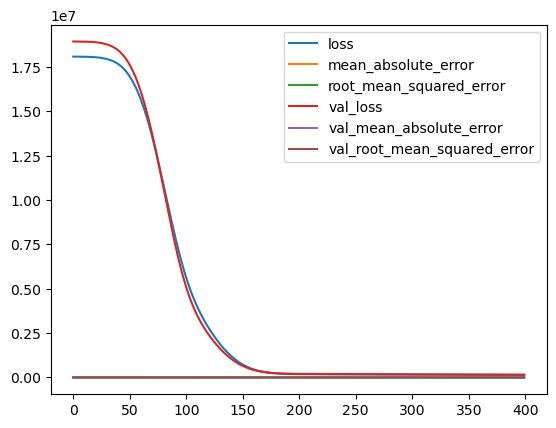

In [17]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [18]:
# loss = model.history.history['loss']
# sns.lineplot(x=range(len(loss)),y=loss)
# plt.title("Training Loss per Epoch");

In [19]:
model.metrics_names

['loss', 'mean_absolute_error', 'root_mean_squared_error']

In [20]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [21]:
training_score

[141161.25, 306.8269958496094, 375.7143249511719]

In [22]:
test_score

[158253.34375, 309.2882995605469, 397.8106994628906]

In [23]:
test_predictions = model.predict(X_test)
test_predictions = pd.Series(test_predictions.reshape(test_predictions.shape[0],))

4/4 [==============================] - 0s 3ms/step


In [24]:
test_predictions

0     3134.056152
1     3488.049316
2     3921.899414
3     3346.889648
4     4287.171875
         ...     
95    4642.423340
96    4090.518555
97    5357.546875
98    3587.689453
99    4235.073730
Length: 100, dtype: float32

In [25]:
pred_df = pd.DataFrame(y_test).reset_index(drop = True)
pred_df['Model_Predictions'] = test_predictions
pred_df.columns = ['Test_Y','Model_Predictions']

In [26]:
pred_df

,Test_Y,Model_Predictions
0,3600.0,3134.056152
1,4350.0,3488.049316
2,4100.0,3921.899414
3,4300.0,3346.889648
4,3800.0,4287.171875
...,...,...
95,4300.0,4642.423340
96,4000.0,4090.518555
97,5200.0,5357.546875
98,3750.0,3587.689453


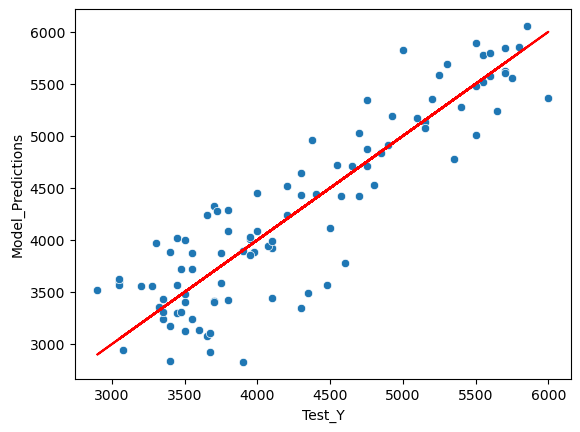

In [27]:
sns.scatterplot(x='Test_Y',y='Model_Predictions',data=pred_df)
plt.plot(y_test,y_test,'r')

In [28]:
pred_df['Error'] = pred_df['Test_Y'] - pred_df['Model_Predictions']

C:\Windows\Temp\ipykernel_7032\1928191693.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_df['Error'],bins=50);


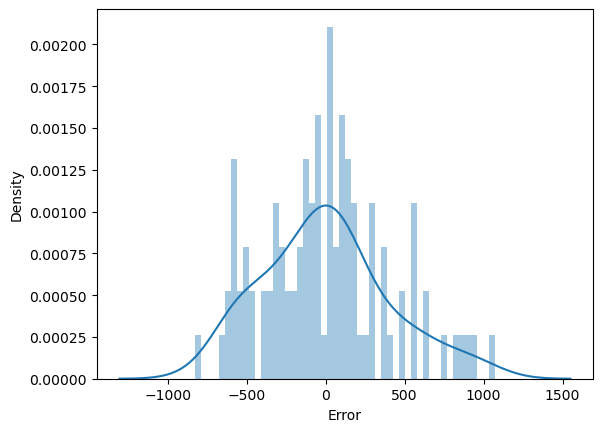

In [29]:
sns.distplot(pred_df['Error'],bins=50);

In [30]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(pred_df["Test_Y"],pred_df["Model_Predictions"])}')
print(f'Mean Squared Error: {metrics.mean_squared_error(pred_df["Test_Y"],pred_df["Model_Predictions"])}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(pred_df["Test_Y"],pred_df["Model_Predictions"]))}')

Mean Absolute Error: 309.28830810546873
Mean Squared Error: 158253.34493867456
Root Mean Squared Error: 397.81068982453775


In [31]:
np.sqrt(metrics.mean_squared_error(pred_df["Test_Y"],pred_df["Model_Predictions"]))/pred_df["Test_Y"].mean()

0.0931313800361788

In [32]:
metrics.explained_variance_score(pred_df["Test_Y"],pred_df["Model_Predictions"])

0.7728860120320515

## Early Stopping

In [33]:
model = Sequential()

model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse', metrics=[ 'MeanAbsoluteError', 'RootMeanSquaredError'])

In [34]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [35]:
model.fit(x=X_train,y=y_train, 
          validation_data=(X_test,y_test.values), 
          batch_size=32,epochs=400, verbose = 1), 
callbacks=[early_stop]

Epoch 1/400
8/8 [==============================] - 2s 37ms/step - loss: 18086060.0000 - mean_absolute_error: 4178.9263 - root_mean_squared_error: 4252.7710 - val_loss: 18938672.0000 - val_mean_absolute_error: 4271.0020 - val_root_mean_squared_error: 4351.8584
Epoch 2/400
8/8 [==============================] - 0s 10ms/step - loss: 18084952.0000 - mean_absolute_error: 4178.7944 - root_mean_squared_error: 4252.6406 - val_loss: 18937574.0000 - val_mean_absolute_error: 4270.8721 - val_root_mean_squared_error: 4351.7324
Epoch 3/400
8/8 [==============================] - 0s 10ms/step - loss: 18083776.0000 - mean_absolute_error: 4178.6543 - root_mean_squared_error: 4252.5024 - val_loss: 18936356.0000 - val_mean_absolute_error: 4270.7280 - val_root_mean_squared_error: 4351.5923
Epoch 4/400
8/8 [==============================] - 0s 10ms/step - loss: 18082448.0000 - mean_absolute_error: 4178.4976 - root_mean_squared_error: 4252.3462 - val_loss: 18934922.0000 - val_mean_absolute_error: 4270.5610 -

8/8 [==============================] - 0s 8ms/step - loss: 17723378.0000 - mean_absolute_error: 4137.7188 - root_mean_squared_error: 4209.9141 - val_loss: 18519672.0000 - val_mean_absolute_error: 4224.6138 - val_root_mean_squared_error: 4303.4487
Epoch 33/400
8/8 [==============================] - 0s 9ms/step - loss: 17681458.0000 - mean_absolute_error: 4132.9995 - root_mean_squared_error: 4204.9326 - val_loss: 18470630.0000 - val_mean_absolute_error: 4219.2427 - val_root_mean_squared_error: 4297.7471
Epoch 34/400
8/8 [==============================] - 0s 8ms/step - loss: 17635388.0000 - mean_absolute_error: 4127.8438 - root_mean_squared_error: 4199.4507 - val_loss: 18418814.0000 - val_mean_absolute_error: 4213.5405 - val_root_mean_squared_error: 4291.7144
Epoch 35/400
8/8 [==============================] - 0s 8ms/step - loss: 17586646.0000 - mean_absolute_error: 4122.3213 - root_mean_squared_error: 4193.6436 - val_loss: 18361048.0000 - val_mean_absolute_error: 4207.2212 - val_root_mea

8/8 [==============================] - 0s 7ms/step - loss: 13566925.0000 - mean_absolute_error: 3642.9727 - root_mean_squared_error: 3683.3308 - val_loss: 13749377.0000 - val_mean_absolute_error: 3667.7429 - val_root_mean_squared_error: 3708.0151
Epoch 64/400
8/8 [==============================] - 0s 8ms/step - loss: 13312969.0000 - mean_absolute_error: 3609.9028 - root_mean_squared_error: 3648.6941 - val_loss: 13461275.0000 - val_mean_absolute_error: 3630.7112 - val_root_mean_squared_error: 3668.9609
Epoch 65/400
8/8 [==============================] - 0s 8ms/step - loss: 13048374.0000 - mean_absolute_error: 3575.2195 - root_mean_squared_error: 3612.2534 - val_loss: 13164140.0000 - val_mean_absolute_error: 3592.0427 - val_root_mean_squared_error: 3628.2419
Epoch 66/400
8/8 [==============================] - 0s 8ms/step - loss: 12784874.0000 - mean_absolute_error: 3539.9272 - root_mean_squared_error: 3575.5942 - val_loss: 12867603.0000 - val_mean_absolute_error: 3552.8250 - val_root_mea

Epoch 95/400
8/8 [==============================] - 0s 7ms/step - loss: 4614488.5000 - mean_absolute_error: 2043.5969 - root_mean_squared_error: 2148.1360 - val_loss: 4165883.2500 - val_mean_absolute_error: 1932.0023 - val_root_mean_squared_error: 2041.0496
Epoch 96/400
8/8 [==============================] - 0s 8ms/step - loss: 4404612.5000 - mean_absolute_error: 1985.4384 - root_mean_squared_error: 2098.7168 - val_loss: 3960778.2500 - val_mean_absolute_error: 1870.4712 - val_root_mean_squared_error: 1990.1704
Epoch 97/400
8/8 [==============================] - 0s 8ms/step - loss: 4201662.5000 - mean_absolute_error: 1927.1191 - root_mean_squared_error: 2049.7957 - val_loss: 3764939.2500 - val_mean_absolute_error: 1809.5294 - val_root_mean_squared_error: 1940.3451
Epoch 98/400
8/8 [==============================] - 0s 8ms/step - loss: 4006763.0000 - mean_absolute_error: 1869.6536 - root_mean_squared_error: 2001.6901 - val_loss: 3579242.0000 - val_mean_absolute_error: 1749.7716 - val_roo

Epoch 127/400
8/8 [==============================] - 0s 8ms/step - loss: 976260.1875 - mean_absolute_error: 813.0692 - root_mean_squared_error: 988.0588 - val_loss: 870812.8750 - val_mean_absolute_error: 762.5817 - val_root_mean_squared_error: 933.1735
Epoch 128/400
8/8 [==============================] - 0s 8ms/step - loss: 927504.5625 - mean_absolute_error: 791.3735 - root_mean_squared_error: 963.0704 - val_loss: 830828.9375 - val_mean_absolute_error: 746.0070 - val_root_mean_squared_error: 911.4982
Epoch 129/400
8/8 [==============================] - 0s 8ms/step - loss: 885639.5000 - mean_absolute_error: 772.1428 - root_mean_squared_error: 941.0842 - val_loss: 791976.9375 - val_mean_absolute_error: 729.2612 - val_root_mean_squared_error: 889.9308
Epoch 130/400
8/8 [==============================] - 0s 9ms/step - loss: 841944.1875 - mean_absolute_error: 751.7432 - root_mean_squared_error: 917.5752 - val_loss: 757086.5000 - val_mean_absolute_error: 713.4250 - val_root_mean_squared_erro

8/8 [==============================] - 0s 7ms/step - loss: 293495.9688 - mean_absolute_error: 444.4287 - root_mean_squared_error: 541.7527 - val_loss: 277946.6250 - val_mean_absolute_error: 427.6720 - val_root_mean_squared_error: 527.2064
Epoch 160/400
8/8 [==============================] - 0s 7ms/step - loss: 287753.5938 - mean_absolute_error: 440.2423 - root_mean_squared_error: 536.4267 - val_loss: 273337.4688 - val_mean_absolute_error: 424.3187 - val_root_mean_squared_error: 522.8168
Epoch 161/400
8/8 [==============================] - 0s 6ms/step - loss: 283064.0312 - mean_absolute_error: 436.2714 - root_mean_squared_error: 532.0376 - val_loss: 268714.5312 - val_mean_absolute_error: 420.8747 - val_root_mean_squared_error: 518.3768
Epoch 162/400
8/8 [==============================] - 0s 7ms/step - loss: 278339.5938 - mean_absolute_error: 432.5034 - root_mean_squared_error: 527.5790 - val_loss: 264310.5000 - val_mean_absolute_error: 417.4643 - val_root_mean_squared_error: 514.1114
Ep

8/8 [==============================] - 0s 8ms/step - loss: 218652.4531 - mean_absolute_error: 378.1777 - root_mean_squared_error: 467.6029 - val_loss: 206038.9062 - val_mean_absolute_error: 366.5383 - val_root_mean_squared_error: 453.9151
Epoch 192/400
8/8 [==============================] - 0s 9ms/step - loss: 217652.0000 - mean_absolute_error: 377.3445 - root_mean_squared_error: 466.5319 - val_loss: 205108.7344 - val_mean_absolute_error: 365.5741 - val_root_mean_squared_error: 452.8893
Epoch 193/400
8/8 [==============================] - 0s 9ms/step - loss: 216529.4062 - mean_absolute_error: 376.2679 - root_mean_squared_error: 465.3272 - val_loss: 204054.1406 - val_mean_absolute_error: 364.5503 - val_root_mean_squared_error: 451.7235
Epoch 194/400
8/8 [==============================] - 0s 8ms/step - loss: 215666.0625 - mean_absolute_error: 375.5233 - root_mean_squared_error: 464.3986 - val_loss: 203159.2656 - val_mean_absolute_error: 363.7444 - val_root_mean_squared_error: 450.7319
Ep

8/8 [==============================] - 0s 9ms/step - loss: 194054.2500 - mean_absolute_error: 357.7331 - root_mean_squared_error: 440.5159 - val_loss: 183703.0469 - val_mean_absolute_error: 345.4253 - val_root_mean_squared_error: 428.6059
Epoch 224/400
8/8 [==============================] - 0s 9ms/step - loss: 193542.7188 - mean_absolute_error: 357.3731 - root_mean_squared_error: 439.9349 - val_loss: 183352.5469 - val_mean_absolute_error: 345.1187 - val_root_mean_squared_error: 428.1969
Epoch 225/400
8/8 [==============================] - 0s 8ms/step - loss: 192907.8750 - mean_absolute_error: 356.8742 - root_mean_squared_error: 439.2128 - val_loss: 183044.3125 - val_mean_absolute_error: 344.9434 - val_root_mean_squared_error: 427.8368
Epoch 226/400
8/8 [==============================] - 0s 9ms/step - loss: 192378.3906 - mean_absolute_error: 356.3312 - root_mean_squared_error: 438.6096 - val_loss: 182289.5625 - val_mean_absolute_error: 344.0410 - val_root_mean_squared_error: 426.9538
Ep

8/8 [==============================] - 0s 12ms/step - loss: 178317.7500 - mean_absolute_error: 344.3866 - root_mean_squared_error: 422.2769 - val_loss: 169438.5781 - val_mean_absolute_error: 331.2360 - val_root_mean_squared_error: 411.6292
Epoch 256/400
8/8 [==============================] - 0s 10ms/step - loss: 177822.2812 - mean_absolute_error: 344.0267 - root_mean_squared_error: 421.6898 - val_loss: 169214.8594 - val_mean_absolute_error: 331.2126 - val_root_mean_squared_error: 411.3573
Epoch 257/400
8/8 [==============================] - 0s 8ms/step - loss: 177485.1094 - mean_absolute_error: 343.7281 - root_mean_squared_error: 421.2898 - val_loss: 168966.2812 - val_mean_absolute_error: 331.1637 - val_root_mean_squared_error: 411.0551
Epoch 258/400
8/8 [==============================] - 0s 9ms/step - loss: 177115.6406 - mean_absolute_error: 343.4096 - root_mean_squared_error: 420.8511 - val_loss: 168734.1875 - val_mean_absolute_error: 331.0996 - val_root_mean_squared_error: 410.7727


8/8 [==============================] - 0s 10ms/step - loss: 165650.1562 - mean_absolute_error: 333.4919 - root_mean_squared_error: 407.0014 - val_loss: 158000.0156 - val_mean_absolute_error: 319.5890 - val_root_mean_squared_error: 397.4922
Epoch 288/400
8/8 [==============================] - 0s 9ms/step - loss: 165308.7344 - mean_absolute_error: 333.2575 - root_mean_squared_error: 406.5818 - val_loss: 157577.8906 - val_mean_absolute_error: 319.0984 - val_root_mean_squared_error: 396.9608
Epoch 289/400
8/8 [==============================] - 0s 9ms/step - loss: 164903.1094 - mean_absolute_error: 332.9525 - root_mean_squared_error: 406.0826 - val_loss: 157166.7656 - val_mean_absolute_error: 318.5902 - val_root_mean_squared_error: 396.4426
Epoch 290/400
8/8 [==============================] - 0s 8ms/step - loss: 164636.9062 - mean_absolute_error: 332.7979 - root_mean_squared_error: 405.7547 - val_loss: 156627.0156 - val_mean_absolute_error: 317.9039 - val_root_mean_squared_error: 395.7613
E

8/8 [==============================] - 0s 8ms/step - loss: 155546.0312 - mean_absolute_error: 324.4065 - root_mean_squared_error: 394.3932 - val_loss: 149256.1250 - val_mean_absolute_error: 311.0185 - val_root_mean_squared_error: 386.3368
Epoch 320/400
8/8 [==============================] - 0s 7ms/step - loss: 155360.5938 - mean_absolute_error: 324.1709 - root_mean_squared_error: 394.1581 - val_loss: 149076.1562 - val_mean_absolute_error: 311.1117 - val_root_mean_squared_error: 386.1038
Epoch 321/400
8/8 [==============================] - 0s 7ms/step - loss: 155049.2812 - mean_absolute_error: 323.7922 - root_mean_squared_error: 393.7630 - val_loss: 148618.3906 - val_mean_absolute_error: 310.7773 - val_root_mean_squared_error: 385.5106
Epoch 322/400
8/8 [==============================] - 0s 8ms/step - loss: 154726.6406 - mean_absolute_error: 323.5361 - root_mean_squared_error: 393.3531 - val_loss: 148626.8125 - val_mean_absolute_error: 310.9093 - val_root_mean_squared_error: 385.5215
Ep

8/8 [==============================] - 0s 7ms/step - loss: 147753.4219 - mean_absolute_error: 316.9264 - root_mean_squared_error: 384.3871 - val_loss: 142780.1250 - val_mean_absolute_error: 305.1125 - val_root_mean_squared_error: 377.8626
Epoch 352/400
8/8 [==============================] - 0s 8ms/step - loss: 147613.0781 - mean_absolute_error: 316.8008 - root_mean_squared_error: 384.2045 - val_loss: 142829.5625 - val_mean_absolute_error: 305.2385 - val_root_mean_squared_error: 377.9280
Epoch 353/400
8/8 [==============================] - 0s 7ms/step - loss: 147333.8125 - mean_absolute_error: 316.5483 - root_mean_squared_error: 383.8409 - val_loss: 142253.1875 - val_mean_absolute_error: 304.2621 - val_root_mean_squared_error: 377.1647
Epoch 354/400
8/8 [==============================] - 0s 8ms/step - loss: 147172.5156 - mean_absolute_error: 316.5599 - root_mean_squared_error: 383.6307 - val_loss: 141749.1875 - val_mean_absolute_error: 303.4959 - val_root_mean_squared_error: 376.4959
Ep

8/8 [==============================] - 0s 7ms/step - loss: 141681.7500 - mean_absolute_error: 310.6093 - root_mean_squared_error: 376.4064 - val_loss: 138344.3438 - val_mean_absolute_error: 299.0992 - val_root_mean_squared_error: 371.9467
Epoch 384/400
8/8 [==============================] - 0s 7ms/step - loss: 141415.2656 - mean_absolute_error: 310.3326 - root_mean_squared_error: 376.0522 - val_loss: 137699.2656 - val_mean_absolute_error: 298.2226 - val_root_mean_squared_error: 371.0785
Epoch 385/400
8/8 [==============================] - 0s 7ms/step - loss: 141249.9688 - mean_absolute_error: 310.1402 - root_mean_squared_error: 375.8324 - val_loss: 136991.2969 - val_mean_absolute_error: 297.2841 - val_root_mean_squared_error: 370.1234
Epoch 386/400
8/8 [==============================] - 0s 7ms/step - loss: 140996.9062 - mean_absolute_error: 309.9696 - root_mean_squared_error: 375.4955 - val_loss: 136798.0312 - val_mean_absolute_error: 297.0868 - val_root_mean_squared_error: 369.8622
Ep

## Evaluation

In [36]:
model.history.history

{'loss': [18086060.0,
  18084952.0,
  18083776.0,
  18082448.0,
  18080882.0,
  18079082.0,
  18077056.0,
  18074834.0,
  18072390.0,
  18069686.0,
  18066596.0,
  18063102.0,
  18059028.0,
  18054416.0,
  18049076.0,
  18042994.0,
  18036106.0,
  18028102.0,
  18019120.0,
  18008464.0,
  17996460.0,
  17982804.0,
  17967352.0,
  17950098.0,
  17930468.0,
  17908660.0,
  17884938.0,
  17858104.0,
  17829102.0,
  17796534.0,
  17761998.0,
  17723378.0,
  17681458.0,
  17635388.0,
  17586646.0,
  17531996.0,
  17473466.0,
  17409356.0,
  17339180.0,
  17265162.0,
  17185908.0,
  17100496.0,
  17005720.0,
  16906414.0,
  16798156.0,
  16686201.0,
  16564609.0,
  16433078.0,
  16299972.0,
  16156331.0,
  16004092.0,
  15844603.0,
  15681321.0,
  15503582.0,
  15323842.0,
  15126418.0,
  14931394.0,
  14720287.0,
  14502356.0,
  14278128.0,
  14048335.0,
  13804692.0,
  13566925.0,
  13312969.0,
  13048374.0,
  12784874.0,
  12514859.0,
  12236131.0,
  11957140.0,
  11669931.0,
  11377260.0

<Axes: >

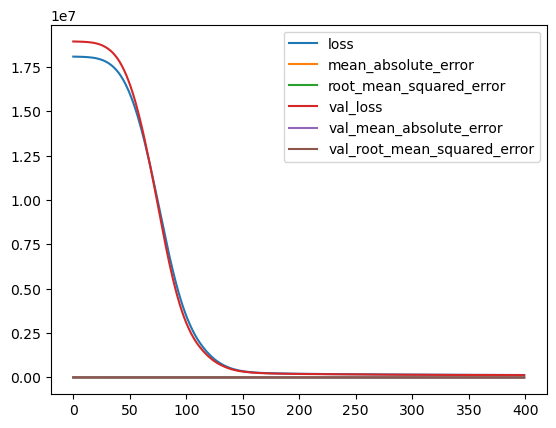

In [37]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [38]:
# loss = model.history.history['loss']
# sns.lineplot(x=range(len(loss)),y=loss)
# plt.title("Training Loss per Epoch");

In [39]:
model.metrics_names

['loss', 'mean_absolute_error', 'root_mean_squared_error']

In [40]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [41]:
training_score

[138451.640625, 307.16754150390625, 372.0909118652344]

In [42]:
test_score

[132522.203125, 292.3012390136719, 364.0359802246094]

In [43]:
test_predictions = model.predict(X_test)
test_predictions = pd.Series(test_predictions.reshape(test_predictions.shape[0],))

4/4 [==============================] - 0s 2ms/step


In [44]:
test_predictions

0     3264.857666
1     3739.944824
2     3823.949219
3     3832.406006
4     4481.663086
         ...     
95    4677.373047
96    3930.536621
97    5337.770508
98    3614.976562
99    4204.824219
Length: 100, dtype: float32

In [45]:
pred_df = pd.DataFrame(y_test).reset_index(drop = True)
pred_df['Model_Predictions'] = test_predictions
pred_df.columns = ['Test_Y','Model_Predictions']

In [46]:
pred_df

,Test_Y,Model_Predictions
0,3600.0,3264.857666
1,4350.0,3739.944824
2,4100.0,3823.949219
3,4300.0,3832.406006
4,3800.0,4481.663086
...,...,...
95,4300.0,4677.373047
96,4000.0,3930.536621
97,5200.0,5337.770508
98,3750.0,3614.976562


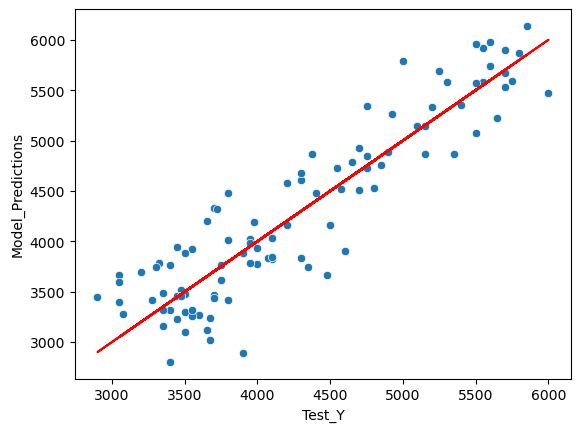

In [47]:
sns.scatterplot(x='Test_Y',y='Model_Predictions',data=pred_df)
plt.plot(y_test,y_test,'r')

In [48]:
pred_df['Error'] = pred_df['Test_Y'] - pred_df['Model_Predictions']

C:\Windows\Temp\ipykernel_7032\1928191693.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_df['Error'],bins=50);


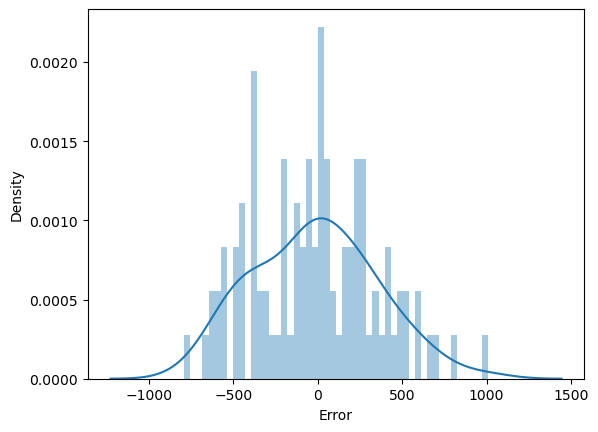

In [49]:
sns.distplot(pred_df['Error'],bins=50);

In [50]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(pred_df["Test_Y"],pred_df["Model_Predictions"])}')
print(f'Mean Squared Error: {metrics.mean_squared_error(pred_df["Test_Y"],pred_df["Model_Predictions"])}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(pred_df["Test_Y"],pred_df["Model_Predictions"]))}')

Mean Absolute Error: 292.30126953125
Mean Squared Error: 132522.21308360578
Root Mean Squared Error: 364.03600520224063


In [51]:
np.sqrt(metrics.mean_squared_error(pred_df["Test_Y"],pred_df["Model_Predictions"]))/pred_df["Test_Y"].mean()

0.08522439545879448

In [52]:
metrics.explained_variance_score(pred_df["Test_Y"],pred_df["Model_Predictions"])

0.8102611951607475

## Adding in DropOut Layers

In [53]:
model = Sequential()

model.add(Dense(8,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4,activation='relu'))
model.add(Dropout(0.5))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse', metrics=[ 'MeanAbsoluteError', 'RootMeanSquaredError'])

In [54]:
model.fit(x=X_train,y=y_train, 
          validation_data=(X_test,y_test.values), 
          batch_size=32,epochs=400, verbose = 1), 
callbacks=[early_stop]

Epoch 1/400
8/8 [==============================] - 2s 41ms/step - loss: 18088322.0000 - mean_absolute_error: 4179.2334 - root_mean_squared_error: 4253.0366 - val_loss: 18941138.0000 - val_mean_absolute_error: 4271.3359 - val_root_mean_squared_error: 4352.1416
Epoch 2/400
8/8 [==============================] - 0s 10ms/step - loss: 18088500.0000 - mean_absolute_error: 4179.2544 - root_mean_squared_error: 4253.0576 - val_loss: 18940422.0000 - val_mean_absolute_error: 4271.2524 - val_root_mean_squared_error: 4352.0596
Epoch 3/400
8/8 [==============================] - 0s 10ms/step - loss: 18086562.0000 - mean_absolute_error: 4179.0181 - root_mean_squared_error: 4252.8301 - val_loss: 18939682.0000 - val_mean_absolute_error: 4271.1670 - val_root_mean_squared_error: 4351.9746
Epoch 4/400
8/8 [==============================] - 0s 9ms/step - loss: 18086614.0000 - mean_absolute_error: 4179.0195 - root_mean_squared_error: 4252.8359 - val_loss: 18938892.0000 - val_mean_absolute_error: 4271.0762 - 

8/8 [==============================] - 0s 11ms/step - loss: 17992696.0000 - mean_absolute_error: 4167.7783 - root_mean_squared_error: 4241.7798 - val_loss: 18847154.0000 - val_mean_absolute_error: 4260.4902 - val_root_mean_squared_error: 4341.3311
Epoch 33/400
8/8 [==============================] - 0s 10ms/step - loss: 17998998.0000 - mean_absolute_error: 4168.5557 - root_mean_squared_error: 4242.5225 - val_loss: 18837456.0000 - val_mean_absolute_error: 4259.3589 - val_root_mean_squared_error: 4340.2139
Epoch 34/400
8/8 [==============================] - 0s 10ms/step - loss: 17981722.0000 - mean_absolute_error: 4166.6445 - root_mean_squared_error: 4240.4858 - val_loss: 18827144.0000 - val_mean_absolute_error: 4258.1602 - val_root_mean_squared_error: 4339.0259
Epoch 35/400
8/8 [==============================] - 0s 10ms/step - loss: 17977798.0000 - mean_absolute_error: 4165.6670 - root_mean_squared_error: 4240.0234 - val_loss: 18815948.0000 - val_mean_absolute_error: 4256.8408 - val_root

8/8 [==============================] - 0s 9ms/step - loss: 17160410.0000 - mean_absolute_error: 4063.4729 - root_mean_squared_error: 4142.5127 - val_loss: 17829614.0000 - val_mean_absolute_error: 4137.2251 - val_root_mean_squared_error: 4222.5127
Epoch 64/400
8/8 [==============================] - 0s 10ms/step - loss: 17120746.0000 - mean_absolute_error: 4055.5210 - root_mean_squared_error: 4137.7222 - val_loss: 17760568.0000 - val_mean_absolute_error: 4128.6958 - val_root_mean_squared_error: 4214.3291
Epoch 65/400
8/8 [==============================] - 0s 10ms/step - loss: 16998722.0000 - mean_absolute_error: 4040.8550 - root_mean_squared_error: 4122.9507 - val_loss: 17689704.0000 - val_mean_absolute_error: 4119.9082 - val_root_mean_squared_error: 4205.9131
Epoch 66/400
8/8 [==============================] - 0s 9ms/step - loss: 16932502.0000 - mean_absolute_error: 4032.2256 - root_mean_squared_error: 4114.9121 - val_loss: 17613510.0000 - val_mean_absolute_error: 4110.3989 - val_root_m

8/8 [==============================] - 0s 8ms/step - loss: 13464088.0000 - mean_absolute_error: 3473.1316 - root_mean_squared_error: 3669.3442 - val_loss: 13760270.0000 - val_mean_absolute_error: 3599.0903 - val_root_mean_squared_error: 3709.4839
Epoch 95/400
8/8 [==============================] - 0s 8ms/step - loss: 13510627.0000 - mean_absolute_error: 3513.3142 - root_mean_squared_error: 3675.6804 - val_loss: 13573130.0000 - val_mean_absolute_error: 3572.6650 - val_root_mean_squared_error: 3684.1729
Epoch 96/400
8/8 [==============================] - 0s 7ms/step - loss: 13479239.0000 - mean_absolute_error: 3477.9304 - root_mean_squared_error: 3671.4082 - val_loss: 13382525.0000 - val_mean_absolute_error: 3545.5149 - val_root_mean_squared_error: 3658.2134
Epoch 97/400
8/8 [==============================] - 0s 9ms/step - loss: 13265719.0000 - mean_absolute_error: 3431.7500 - root_mean_squared_error: 3642.2134 - val_loss: 13199433.0000 - val_mean_absolute_error: 3519.0476 - val_root_mea

8/8 [==============================] - 0s 7ms/step - loss: 11405159.0000 - mean_absolute_error: 3076.8071 - root_mean_squared_error: 3377.1526 - val_loss: 8847539.0000 - val_mean_absolute_error: 2828.1526 - val_root_mean_squared_error: 2974.4812
Epoch 126/400
8/8 [==============================] - 0s 8ms/step - loss: 10679163.0000 - mean_absolute_error: 2946.8469 - root_mean_squared_error: 3267.8989 - val_loss: 8765048.0000 - val_mean_absolute_error: 2815.1562 - val_root_mean_squared_error: 2960.5823
Epoch 127/400
8/8 [==============================] - 0s 10ms/step - loss: 11398064.0000 - mean_absolute_error: 3062.8972 - root_mean_squared_error: 3376.1018 - val_loss: 8666479.0000 - val_mean_absolute_error: 2798.6738 - val_root_mean_squared_error: 2943.8884
Epoch 128/400
8/8 [==============================] - 0s 8ms/step - loss: 10286382.0000 - mean_absolute_error: 2865.5063 - root_mean_squared_error: 3207.2390 - val_loss: 8553301.0000 - val_mean_absolute_error: 2779.5483 - val_root_mea

8/8 [==============================] - 0s 8ms/step - loss: 10190797.0000 - mean_absolute_error: 2839.5535 - root_mean_squared_error: 3192.3027 - val_loss: 6885431.0000 - val_mean_absolute_error: 2495.4204 - val_root_mean_squared_error: 2624.0105
Epoch 157/400
8/8 [==============================] - 0s 7ms/step - loss: 9726438.0000 - mean_absolute_error: 2690.0999 - root_mean_squared_error: 3118.7239 - val_loss: 6845799.0000 - val_mean_absolute_error: 2488.6533 - val_root_mean_squared_error: 2616.4478
Epoch 158/400
8/8 [==============================] - 0s 7ms/step - loss: 10077892.0000 - mean_absolute_error: 2783.1545 - root_mean_squared_error: 3174.5696 - val_loss: 6827838.5000 - val_mean_absolute_error: 2486.7798 - val_root_mean_squared_error: 2613.0132
Epoch 159/400
8/8 [==============================] - 0s 8ms/step - loss: 10575853.0000 - mean_absolute_error: 2892.5706 - root_mean_squared_error: 3252.0537 - val_loss: 6796709.0000 - val_mean_absolute_error: 2482.1846 - val_root_mean_

Epoch 188/400
8/8 [==============================] - 0s 9ms/step - loss: 9386271.0000 - mean_absolute_error: 2668.9670 - root_mean_squared_error: 3063.7021 - val_loss: 6644005.0000 - val_mean_absolute_error: 2478.9424 - val_root_mean_squared_error: 2577.5967
Epoch 189/400
8/8 [==============================] - 0s 8ms/step - loss: 10125652.0000 - mean_absolute_error: 2800.8916 - root_mean_squared_error: 3182.0830 - val_loss: 6585952.5000 - val_mean_absolute_error: 2467.5771 - val_root_mean_squared_error: 2566.3110
Epoch 190/400
8/8 [==============================] - 0s 8ms/step - loss: 9865862.0000 - mean_absolute_error: 2772.9270 - root_mean_squared_error: 3140.9971 - val_loss: 6550470.5000 - val_mean_absolute_error: 2460.3811 - val_root_mean_squared_error: 2559.3887
Epoch 191/400
8/8 [==============================] - 0s 8ms/step - loss: 10081900.0000 - mean_absolute_error: 2750.4155 - root_mean_squared_error: 3175.2007 - val_loss: 6509542.0000 - val_mean_absolute_error: 2452.1462 - v

8/8 [==============================] - 0s 9ms/step - loss: 9367206.0000 - mean_absolute_error: 2667.9543 - root_mean_squared_error: 3060.5891 - val_loss: 6327178.0000 - val_mean_absolute_error: 2420.8313 - val_root_mean_squared_error: 2515.3882
Epoch 220/400
8/8 [==============================] - 0s 9ms/step - loss: 9890125.0000 - mean_absolute_error: 2759.2083 - root_mean_squared_error: 3144.8569 - val_loss: 6288765.5000 - val_mean_absolute_error: 2413.9697 - val_root_mean_squared_error: 2507.7412
Epoch 221/400
8/8 [==============================] - 0s 9ms/step - loss: 8813077.0000 - mean_absolute_error: 2519.3540 - root_mean_squared_error: 2968.6826 - val_loss: 6266152.5000 - val_mean_absolute_error: 2410.1252 - val_root_mean_squared_error: 2503.2285
Epoch 222/400
8/8 [==============================] - 0s 9ms/step - loss: 10101278.0000 - mean_absolute_error: 2810.7695 - root_mean_squared_error: 3178.2507 - val_loss: 6244538.0000 - val_mean_absolute_error: 2406.4382 - val_root_mean_sq

Epoch 251/400
8/8 [==============================] - 0s 9ms/step - loss: 10370562.0000 - mean_absolute_error: 2851.2056 - root_mean_squared_error: 3220.3357 - val_loss: 6381793.5000 - val_mean_absolute_error: 2428.0886 - val_root_mean_squared_error: 2526.2212
Epoch 252/400
8/8 [==============================] - 0s 9ms/step - loss: 12022662.0000 - mean_absolute_error: 3069.3308 - root_mean_squared_error: 3467.3711 - val_loss: 6370668.0000 - val_mean_absolute_error: 2425.9460 - val_root_mean_squared_error: 2524.0183
Epoch 253/400
8/8 [==============================] - 0s 9ms/step - loss: 10221385.0000 - mean_absolute_error: 2812.7483 - root_mean_squared_error: 3197.0901 - val_loss: 6378302.0000 - val_mean_absolute_error: 2427.2786 - val_root_mean_squared_error: 2525.5300
Epoch 254/400
8/8 [==============================] - 0s 10ms/step - loss: 9793734.0000 - mean_absolute_error: 2752.6255 - root_mean_squared_error: 3129.4941 - val_loss: 6386297.0000 - val_mean_absolute_error: 2428.1169 -

8/8 [==============================] - 0s 10ms/step - loss: 9921736.0000 - mean_absolute_error: 2780.1401 - root_mean_squared_error: 3149.8787 - val_loss: 6259369.0000 - val_mean_absolute_error: 2399.7102 - val_root_mean_squared_error: 2501.8730
Epoch 283/400
8/8 [==============================] - 0s 9ms/step - loss: 10968833.0000 - mean_absolute_error: 2928.9785 - root_mean_squared_error: 3311.9229 - val_loss: 6255252.0000 - val_mean_absolute_error: 2398.7986 - val_root_mean_squared_error: 2501.0503
Epoch 284/400
8/8 [==============================] - 0s 9ms/step - loss: 9982934.0000 - mean_absolute_error: 2699.0229 - root_mean_squared_error: 3159.5781 - val_loss: 6261916.0000 - val_mean_absolute_error: 2400.0764 - val_root_mean_squared_error: 2502.3821
Epoch 285/400
8/8 [==============================] - 0s 9ms/step - loss: 9116519.0000 - mean_absolute_error: 2568.8325 - root_mean_squared_error: 3019.3574 - val_loss: 6283649.5000 - val_mean_absolute_error: 2404.5125 - val_root_mean_s

Epoch 314/400
8/8 [==============================] - 0s 8ms/step - loss: 10338769.0000 - mean_absolute_error: 2766.7705 - root_mean_squared_error: 3215.3955 - val_loss: 6100073.0000 - val_mean_absolute_error: 2364.1680 - val_root_mean_squared_error: 2469.8325
Epoch 315/400
8/8 [==============================] - 0s 9ms/step - loss: 9720719.0000 - mean_absolute_error: 2734.9277 - root_mean_squared_error: 3117.8066 - val_loss: 6079402.0000 - val_mean_absolute_error: 2359.9336 - val_root_mean_squared_error: 2465.6443
Epoch 316/400
8/8 [==============================] - 0s 9ms/step - loss: 9365055.0000 - mean_absolute_error: 2663.4539 - root_mean_squared_error: 3060.2378 - val_loss: 6033990.5000 - val_mean_absolute_error: 2350.1169 - val_root_mean_squared_error: 2456.4182
Epoch 317/400
8/8 [==============================] - 0s 9ms/step - loss: 10175991.0000 - mean_absolute_error: 2794.7139 - root_mean_squared_error: 3189.9829 - val_loss: 6023027.0000 - val_mean_absolute_error: 2347.6123 - v

8/8 [==============================] - 0s 8ms/step - loss: 10387014.0000 - mean_absolute_error: 2816.4697 - root_mean_squared_error: 3222.8892 - val_loss: 6288198.0000 - val_mean_absolute_error: 2412.4683 - val_root_mean_squared_error: 2507.6279
Epoch 346/400
8/8 [==============================] - 0s 8ms/step - loss: 10717840.0000 - mean_absolute_error: 2896.2593 - root_mean_squared_error: 3273.8113 - val_loss: 6287689.5000 - val_mean_absolute_error: 2411.5344 - val_root_mean_squared_error: 2507.5266
Epoch 347/400
8/8 [==============================] - 0s 8ms/step - loss: 10328598.0000 - mean_absolute_error: 2790.1270 - root_mean_squared_error: 3213.8137 - val_loss: 6267572.5000 - val_mean_absolute_error: 2406.7634 - val_root_mean_squared_error: 2503.5120
Epoch 348/400
8/8 [==============================] - 0s 7ms/step - loss: 10352531.0000 - mean_absolute_error: 2839.8010 - root_mean_squared_error: 3217.5349 - val_loss: 6256011.5000 - val_mean_absolute_error: 2404.3235 - val_root_mean

Epoch 377/400
8/8 [==============================] - 0s 9ms/step - loss: 9913759.0000 - mean_absolute_error: 2750.6445 - root_mean_squared_error: 3148.6123 - val_loss: 6011598.0000 - val_mean_absolute_error: 2358.3301 - val_root_mean_squared_error: 2451.8560
Epoch 378/400
8/8 [==============================] - 0s 8ms/step - loss: 9831714.0000 - mean_absolute_error: 2800.3584 - root_mean_squared_error: 3135.5564 - val_loss: 6019977.5000 - val_mean_absolute_error: 2360.0376 - val_root_mean_squared_error: 2453.5642
Epoch 379/400
8/8 [==============================] - 0s 8ms/step - loss: 9930829.0000 - mean_absolute_error: 2690.7068 - root_mean_squared_error: 3151.3218 - val_loss: 6050316.0000 - val_mean_absolute_error: 2366.1648 - val_root_mean_squared_error: 2459.7390
Epoch 380/400
8/8 [==============================] - 0s 7ms/step - loss: 10398229.0000 - mean_absolute_error: 2891.3611 - root_mean_squared_error: 3224.6284 - val_loss: 6088964.0000 - val_mean_absolute_error: 2373.2258 - va

## Evaluation

In [55]:
model.history.history

{'loss': [18088322.0,
  18088500.0,
  18086562.0,
  18086614.0,
  18084842.0,
  18085360.0,
  18082480.0,
  18084306.0,
  18079676.0,
  18080412.0,
  18079358.0,
  18078060.0,
  18077924.0,
  18075134.0,
  18071330.0,
  18071700.0,
  18071644.0,
  18067460.0,
  18064306.0,
  18065314.0,
  18064820.0,
  18055086.0,
  18050962.0,
  18049932.0,
  18046902.0,
  18043318.0,
  18043662.0,
  18031346.0,
  18022680.0,
  18013972.0,
  18018448.0,
  17992696.0,
  17998998.0,
  17981722.0,
  17977798.0,
  17969436.0,
  17951256.0,
  17928580.0,
  17917868.0,
  17909418.0,
  17893806.0,
  17874014.0,
  17827294.0,
  17823134.0,
  17802320.0,
  17758694.0,
  17767126.0,
  17758918.0,
  17711144.0,
  17693526.0,
  17638784.0,
  17547638.0,
  17588752.0,
  17648030.0,
  17472364.0,
  17493766.0,
  17456008.0,
  17370898.0,
  17252756.0,
  17213176.0,
  17253374.0,
  17131430.0,
  17160410.0,
  17120746.0,
  16998722.0,
  16932502.0,
  16702051.0,
  16756509.0,
  16719191.0,
  16759964.0,
  16335865.0

<Axes: >

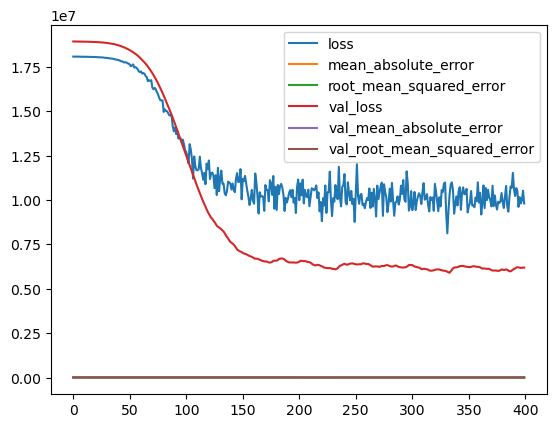

In [56]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [57]:
# loss = model.history.history['loss']
# sns.lineplot(x=range(len(loss)),y=loss)
# plt.title("Training Loss per Epoch");

In [58]:
model.metrics_names

['loss', 'mean_absolute_error', 'root_mean_squared_error']

In [59]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [60]:
training_score

[5862064.0, 2325.11572265625, 2421.169921875]

In [61]:
test_score

[6196002.5, 2397.823974609375, 2489.177001953125]

In [62]:
test_predictions = model.predict(X_test)
test_predictions = pd.Series(test_predictions.reshape(test_predictions.shape[0],))

4/4 [==============================] - 0s 2ms/step


In [63]:
test_predictions

0     1367.969360
1     1746.980957
2     2037.107666
3     1498.526489
4     2372.965088
         ...     
95    1894.080933
96    1768.351074
97    1988.730835
98    1865.884277
99    1963.924683
Length: 100, dtype: float32

In [64]:
pred_df = pd.DataFrame(y_test).reset_index(drop = True)
pred_df['Model_Predictions'] = test_predictions
pred_df.columns = ['Test_Y','Model_Predictions']

In [65]:
pred_df

,Test_Y,Model_Predictions
0,3600.0,1367.969360
1,4350.0,1746.980957
2,4100.0,2037.107666
3,4300.0,1498.526489
4,3800.0,2372.965088
...,...,...
95,4300.0,1894.080933
96,4000.0,1768.351074
97,5200.0,1988.730835
98,3750.0,1865.884277


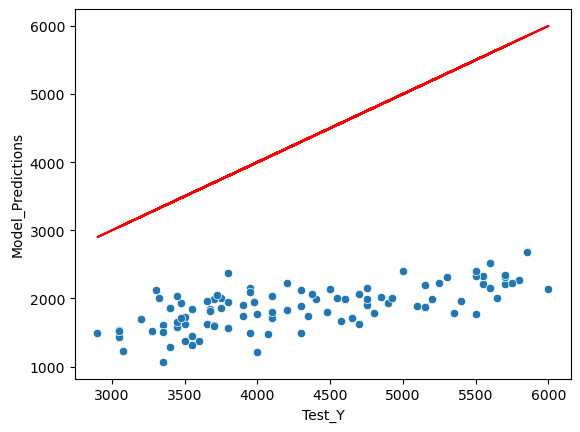

In [66]:
sns.scatterplot(x='Test_Y',y='Model_Predictions',data=pred_df)
plt.plot(y_test,y_test,'r')

In [67]:
pred_df['Error'] = pred_df['Test_Y'] - pred_df['Model_Predictions']

C:\Windows\Temp\ipykernel_7032\1928191693.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_df['Error'],bins=50);


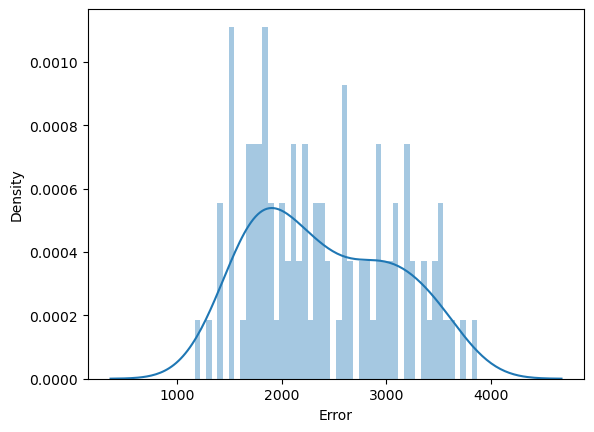

In [68]:
sns.distplot(pred_df['Error'],bins=50);

In [69]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(pred_df["Test_Y"],pred_df["Model_Predictions"])}')
print(f'Mean Squared Error: {metrics.mean_squared_error(pred_df["Test_Y"],pred_df["Model_Predictions"])}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(pred_df["Test_Y"],pred_df["Model_Predictions"]))}')

Mean Absolute Error: 2397.824041748047
Mean Squared Error: 6196002.654264475
Root Mean Squared Error: 2489.1771038366223


In [70]:
np.sqrt(metrics.mean_squared_error(pred_df["Test_Y"],pred_df["Model_Predictions"]))/pred_df["Test_Y"].mean()

0.5827407477084449

In [71]:
metrics.explained_variance_score(pred_df["Test_Y"],pred_df["Model_Predictions"])

0.3592962702301883

## Saving and Loading a Model

In [72]:
# from tensorflow.keras.models import load_model

In [73]:
# model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [74]:
# later_model = load_model('my_model.h5')